In [1]:
import tensorflow as tf
from sklearn.datasets import load_iris
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_data = load_iris().data #返回iris数据集所有输入特征
y_data = load_iris().target #返回iris数据集所有标签

print(x_data,type(x_data))
print(y_data,type(y_data))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
#x_data = DataFrame(x_data, columns=['花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度'])#将数据变成表格，每列加个标签
#pd.set_option('display.unicode.east_asian_width', True)  #设置列对齐
#print(x_data)

In [4]:
#x_data['类别'] = y_data #新加一列确认类别
#print(x_data)

In [5]:
'''
准备数据：
    数据集读入
    数据集乱序
    生成训练集和测试集（即x_train/y_train和x_test/y_test）
    配成对（输入特征，标签），每次读入一小撮（batch）
搭建网络
    定义神经网络中所有可训练参数
参数优化
    嵌套循环迭代，with结构更新参数，显示当前Loss
测试效果
    计算当前参数前向传播后的准确率，显示当前acc
acc/loss可视化
'''

'\n准备数据：\n    数据集读入\n    数据集乱序\n    生成训练集和测试集（即x_train/y_train和x_test/y_test）\n    配成对（输入特征，标签），每次读入一小撮（batch）\n搭建网络\n    定义神经网络中所有可训练参数\n参数优化\n    嵌套循环迭代，with结构更新参数，显示当前Loss\n测试效果\n    计算当前参数前向传播后的准确率，显示当前acc\nacc/loss可视化\n'

In [6]:
#print(x_data, type(x_data))
#x_data = x_data.sample(frac=1)
#print(x_data, type(x_data))
#print(y_data, type(y_data))

In [7]:
np.random.seed(123)  #相同seed使输入特征/标签一一对应
x_data = np.array(x_data)  #将DataFrame格式转为NParray,用来下边打乱
np.random.shuffle(x_data)  #np.random.shuffle只接受列表，否则报错

np.random.seed(123)
np.random.shuffle(y_data)

tf.random.set_seed(123)
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

In [8]:
#数据类型转换
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

In [9]:
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)  #每32组为一个batch喂入神经网络
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [10]:
#定义神经网络所有可训练参数
w1 = tf.Variable(tf.random.truncated_normal([4, 3],stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3],stddev=0.1, seed=1))

In [11]:
#定义超参数
lr = 0.1 #学习率为0.1
train_loss_results = [] # 每轮的loss记录此列表，为画图提供数据
test_acc = [] #每轮的acc记录此列表，为画图提供数据
epoch = 500  #循环500轮
loss_all = 0 # 记录每轮4个step,loss_all记录4个loss和

In [12]:
#训练部分
for epoch in range(epoch):
    for step,(x_train,y_train) in enumerate(train_db):
        with tf.GradientTape()as tape: #记录梯度信息
            #前向传播过程计算Y
            #计算总loss
            y = tf.matmul(x_train, w1) + b1
            y = tf.nn.softmax(y)
            y_ = tf.one_hot(y_train, depth = 3) #标签转换独热码
            loss = tf.reduce_mean(tf.square(y_ -  y))
            loss_all += loss.numpy()
        grads = tape.gradient(loss,[w1,b1])#对w1,b1求偏导
            
        w1.assign_sub(lr*grads[0])#参数自更新
        b1.assign_sub(lr*grads[1])
    print("Epoch{}, loss:{}".format(epoch, loss_all/4))
    train_loss_results.append(loss_all / 4)
    loss_all = 0
    
    #测试部分
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1) #返回y中最大值的索引，即预测分类
        pred = tf.cast(pred, dtype=y_test.dtype) #将pred转成y_test类型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        correct = tf.reduce_sum(correct)  #将每个batch的correct加起来
        total_correct += int(correct)
        total_number += x_test.shape[0]
    #总准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("——————————————————————")

Epoch0, loss:0.2692747041583061
Test_acc: 0.36666666666666664
——————————————————————
Epoch1, loss:0.2515682131052017
Test_acc: 0.36666666666666664
——————————————————————
Epoch2, loss:0.23851819336414337
Test_acc: 0.36666666666666664
——————————————————————
Epoch3, loss:0.2258295826613903
Test_acc: 0.36666666666666664
——————————————————————
Epoch4, loss:0.21258549019694328
Test_acc: 0.4666666666666667
——————————————————————
Epoch5, loss:0.19965483993291855
Test_acc: 0.5666666666666667
——————————————————————
Epoch6, loss:0.18779712915420532
Test_acc: 0.5666666666666667
——————————————————————
Epoch7, loss:0.17739521712064743
Test_acc: 0.5666666666666667
——————————————————————
Epoch8, loss:0.16850513592362404
Test_acc: 0.5666666666666667
——————————————————————
Epoch9, loss:0.16099322959780693
Test_acc: 0.5666666666666667
——————————————————————
Epoch10, loss:0.1546536609530449
Test_acc: 0.5666666666666667
——————————————————————
Epoch11, loss:0.14927657321095467
Test_acc: 0.5666666666666667
—

Epoch99, loss:0.06504870858043432
Test_acc: 0.8333333333333334
——————————————————————
Epoch100, loss:0.06465903948992491
Test_acc: 0.8333333333333334
——————————————————————
Epoch101, loss:0.06427389569580555
Test_acc: 0.8333333333333334
——————————————————————
Epoch102, loss:0.06389320082962513
Test_acc: 0.8333333333333334
——————————————————————
Epoch103, loss:0.06351690087467432
Test_acc: 0.8333333333333334
——————————————————————
Epoch104, loss:0.06314494553953409
Test_acc: 0.8666666666666667
——————————————————————
Epoch105, loss:0.06277726031839848
Test_acc: 0.8666666666666667
——————————————————————
Epoch106, loss:0.062413785606622696
Test_acc: 0.8666666666666667
——————————————————————
Epoch107, loss:0.062054471112787724
Test_acc: 0.9
——————————————————————
Epoch108, loss:0.06169925630092621
Test_acc: 0.9
——————————————————————
Epoch109, loss:0.06134809087961912
Test_acc: 0.9
——————————————————————
Epoch110, loss:0.06100090499967337
Test_acc: 0.9
——————————————————————
Epoch111, loss:

Epoch212, loss:0.03928485885262489
Test_acc: 0.9333333333333333
——————————————————————
Epoch213, loss:0.03915739245712757
Test_acc: 0.9333333333333333
——————————————————————
Epoch214, loss:0.03903096076101065
Test_acc: 0.9333333333333333
——————————————————————
Epoch215, loss:0.03890554513782263
Test_acc: 0.9333333333333333
——————————————————————
Epoch216, loss:0.0387811278924346
Test_acc: 0.9333333333333333
——————————————————————
Epoch217, loss:0.03865770949050784
Test_acc: 0.9333333333333333
——————————————————————
Epoch218, loss:0.03853526758030057
Test_acc: 0.9333333333333333
——————————————————————
Epoch219, loss:0.038413796573877335
Test_acc: 0.9333333333333333
——————————————————————
Epoch220, loss:0.03829328948631883
Test_acc: 0.9333333333333333
——————————————————————
Epoch221, loss:0.038173725828528404
Test_acc: 0.9333333333333333
——————————————————————
Epoch222, loss:0.038055100943893194
Test_acc: 0.9333333333333333
——————————————————————
Epoch223, loss:0.03793740179389715
Test_a

Test_acc: 0.9666666666666667
——————————————————————
Epoch314, loss:0.030089422594755888
Test_acc: 0.9666666666666667
——————————————————————
Epoch315, loss:0.030026308726519346
Test_acc: 0.9666666666666667
——————————————————————
Epoch316, loss:0.02996355900540948
Test_acc: 0.9666666666666667
——————————————————————
Epoch317, loss:0.02990117808803916
Test_acc: 0.9666666666666667
——————————————————————
Epoch318, loss:0.029839161783456802
Test_acc: 0.9666666666666667
——————————————————————
Epoch319, loss:0.02977749239653349
Test_acc: 0.9666666666666667
——————————————————————
Epoch320, loss:0.0297161927446723
Test_acc: 0.9666666666666667
——————————————————————
Epoch321, loss:0.029655237682163715
Test_acc: 0.9666666666666667
——————————————————————
Epoch322, loss:0.02959463419392705
Test_acc: 0.9666666666666667
——————————————————————
Epoch323, loss:0.029534384608268738
Test_acc: 0.9666666666666667
——————————————————————
Epoch324, loss:0.02947446797043085
Test_acc: 0.9666666666666667
——————————

Test_acc: 0.9666666666666667
——————————————————————
Epoch410, loss:0.02534893248230219
Test_acc: 0.9666666666666667
——————————————————————
Epoch411, loss:0.025310490280389786
Test_acc: 0.9666666666666667
——————————————————————
Epoch412, loss:0.02527222642675042
Test_acc: 0.9666666666666667
——————————————————————
Epoch413, loss:0.025234130676835775
Test_acc: 0.9666666666666667
——————————————————————
Epoch414, loss:0.025196205358952284
Test_acc: 0.9666666666666667
——————————————————————
Epoch415, loss:0.025158450473099947
Test_acc: 0.9666666666666667
——————————————————————
Epoch416, loss:0.025120873004198074
Test_acc: 0.9666666666666667
——————————————————————
Epoch417, loss:0.025083451066166162
Test_acc: 0.9666666666666667
——————————————————————
Epoch418, loss:0.025046208407729864
Test_acc: 0.9666666666666667
——————————————————————
Epoch419, loss:0.025009133853018284
Test_acc: 0.9666666666666667
——————————————————————
Epoch420, loss:0.024972214829176664
Test_acc: 0.9666666666666667
—————

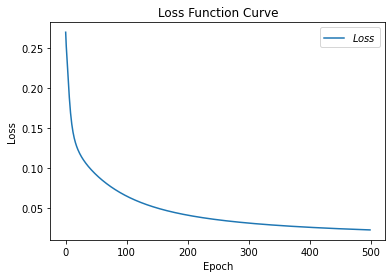

In [13]:
#绘制loss曲线
plt.title('Loss Function Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(train_loss_results, label='$Loss$')  #逐点画出train_loss_results曲线
plt.legend()  # 画出曲线图标
plt.show()

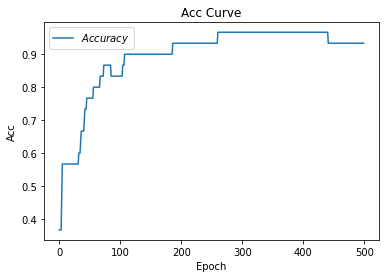

In [14]:
#绘制Accuracy曲线
plt.title('Acc Curve')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.plot(test_acc, label='$Accuracy$')  #逐点画出test_acc曲线
plt.legend()  # 画出曲线图标
plt.show()